In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imaids.models import Kyma22
from idanalysis import IDKickMap
FOLDER_DATA = './results/model/data/'

In [6]:
def get_phase_str(gap):
    """."""
    phase_str = '{:+07.3f}'.format(gap).replace('.', 'p')
    phase_str = phase_str.replace('+', 'pos').replace('-', 'neg')
    return phase_str


def get_kmap_filename(phase):
    fpath = FOLDER_DATA + 'kickmaps/'
    fpath = fpath.replace('model/data/', 'model/')
    phase_str = get_phase_str(phase)
    fname = fpath + 'kickmap-papu50-phase.txt'.format(
        phase_str)
    return fname


def get_termination_kicks(fname):
    idkmap = IDKickMap(kmap_fname=fname)
    kickx_up = idkmap.kickx_upstream  # [T².m²]
    kicky_up = idkmap.kicky_upstream  # [T².m²]
    kickx_down = idkmap.kickx_downstream  # [T².m²]
    kicky_down = idkmap.kicky_downstream  # [T².m²]
    termination_kicks = [kickx_up, kicky_up, kickx_down, kicky_down]
    return termination_kicks

In [ ]:
def generate_radia_model(phase, width):
    """."""
    nr_periods = 5

    block_shape =  [[
                    [width/2 - 3, 0], [width/2, -3], 
                    [width/2, -17], [width/2 -3, -20],
                    [-width/2 + 3, -20], [-width/2, -17],
                     [-width/2, -3], [-width/2 + 3, 0]]]
    kyma = Kyma22(nr_periods=nr_periods)
    kyma.dp = phase

    return kyma

In [4]:
def get_field_on_axis(kyma, rz, plot_flag=True):
    field = kyma.get_field(0, 0, rz)
    bx = field[:, 0]
    by = field[:, 1]
    bz = field[:, 2]

    if plot_flag:
        plt.plot(rz, bx, label='Bx')
        plt.plot(rz, by, label='By')
        plt.plot(rz, bz, label='Bz')
        plt.xlabel('rz [mm]')
        plt.ylabel('Field [T]')
        plt.legend()
        plt.grid()
        plt.show()

    return bx, by, bz

In [11]:
def get_field_roll_off(kyma, rx, peak_idx, filter='on', plot_flag=True):
    """."""
    period = kyma.period_length
    rz = np.linspace(-period/2, period/2, 100)
    field = kyma.get_field(0, 0, rz)
    by = field[:, 1]
    by_max_idx = np.argmax(by)
    rz_at_max = rz[by_max_idx] + peak_idx*period
    field = kyma.get_field(rx, 0, rz_at_max)
    by = field[:, 1]
    by_list = list()
    if filter == 'on':
        for i in range(len(rx)):
            if i >= 6 and i <= len(rx)-7:
                by_temp = by[i-6] + by[i-5] + by[i-4] + by[i-3]
                by_temp += by[i-2] + by[i-1] + by[i] + by[i+1] + by[i+2]
                by_temp += by[i+3] + by[i+4] + by[i+5] + by[i+6]
                by_temp = by_temp/13
                by_list.append(by_temp)
        by_avg = np.array(by_list)
        rx_avg = rx[6:-6]
    else:
        by_avg = by
        rx_avg = rx
    rx5_idx = np.argmin(np.abs(rx_avg - 5))
    rx0_idx = np.argmin(np.abs(rx_avg))
    roff = np.abs(by_avg[rx5_idx]/by_avg[rx0_idx]-1)
    print('roll off = ', 100*roff, '%')
    if plot_flag:
        plt.plot(rx, by)
        plt.xlabel('x [mm]')
        plt.ylabel('By [T]')
        plt.title('Field rolloff at x = 5 mm')
        plt.grid()
        plt.show()


In [5]:
rz = np.linspace(-150, 150, 501)
rx = np.linspace(-10, 10, 4*81)

In [6]:
kyma = generate_radia_model(phase=0, width=36)

In [16]:
kyma.dg = 0

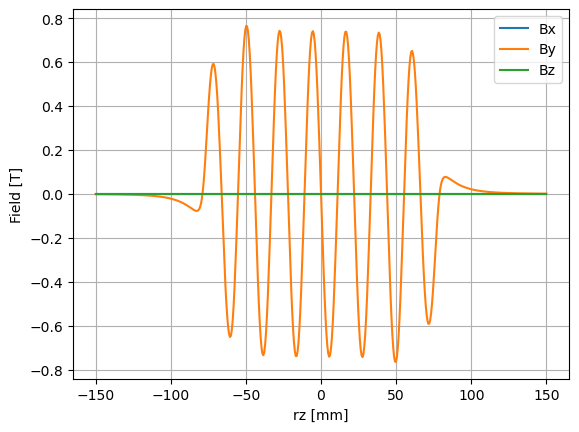

In [7]:
bx, by, bz = get_field_on_axis(kyma, rz)

roll off =  0.5481042028259164 %


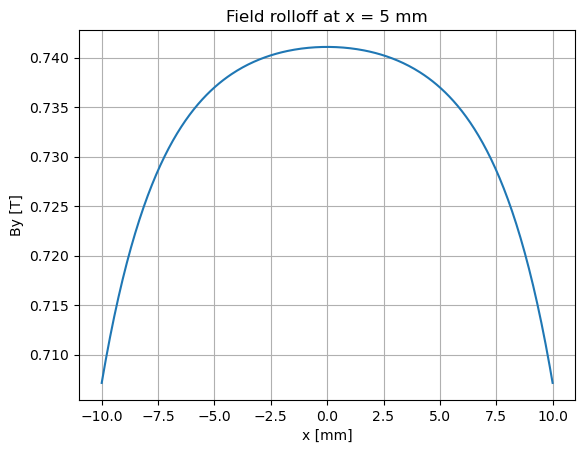

In [12]:
get_field_roll_off(kyma, rx, 0, filter='off', plot_flag=True)